## データの取り込み

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(font="IPAexGothic",style="white")
pd.set_option('display.max_columns', 150)

In [2]:
df_master = pd.read_csv("customer_segmentation_data.csv")
df_master.head()

,index,gender,age,annual_income,spending_score,profession,work_experience,family_size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


## データ探索(EDA)

In [3]:
#データのサマリ
display(df_master.info())
display(df_master.describe())
display(df_master.describe(include="object"))

#クラスター作成に使うデータは7種類
#professionに欠損あり＋Artistが一番多い点が違和感(アーティストの顧客が多い保険会社？？)
#0歳〜99歳までいるのが違和感あり(なぜ0歳の情報が？？)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            2000 non-null   int64 
 1   gender           2000 non-null   object
 2   age              2000 non-null   int64 
 3   annual_income    2000 non-null   int64 
 4   spending_score   2000 non-null   int64 
 5   profession       1965 non-null   object
 6   work_experience  2000 non-null   int64 
 7   family_size      2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


None

,index,age,annual_income,spending_score,work_experience,family_size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


,gender,profession
count,2000,1965
unique,2,9
top,Female,Artist
freq,1186,612


gender
Female    1186
Male       814
Name: index, dtype: int64

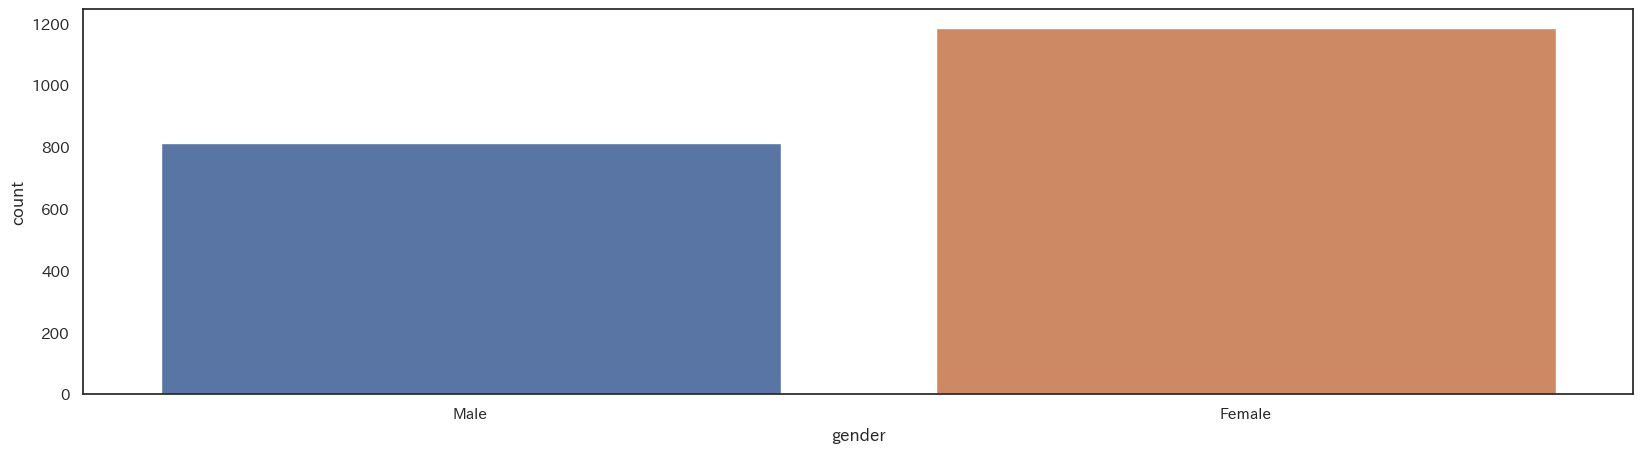

In [16]:
#gender
fig = plt.subplots(figsize=(20,5))
sns.countplot(x="gender", data=df_master)
df_master.groupby("gender").count()["index"]

#女性の比率がやや高め
#後ほどMale=1, Female=0にダミー変換

count    2000.000000
mean       48.960000
std        28.429747
min         0.000000
25%        25.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: age, dtype: float64

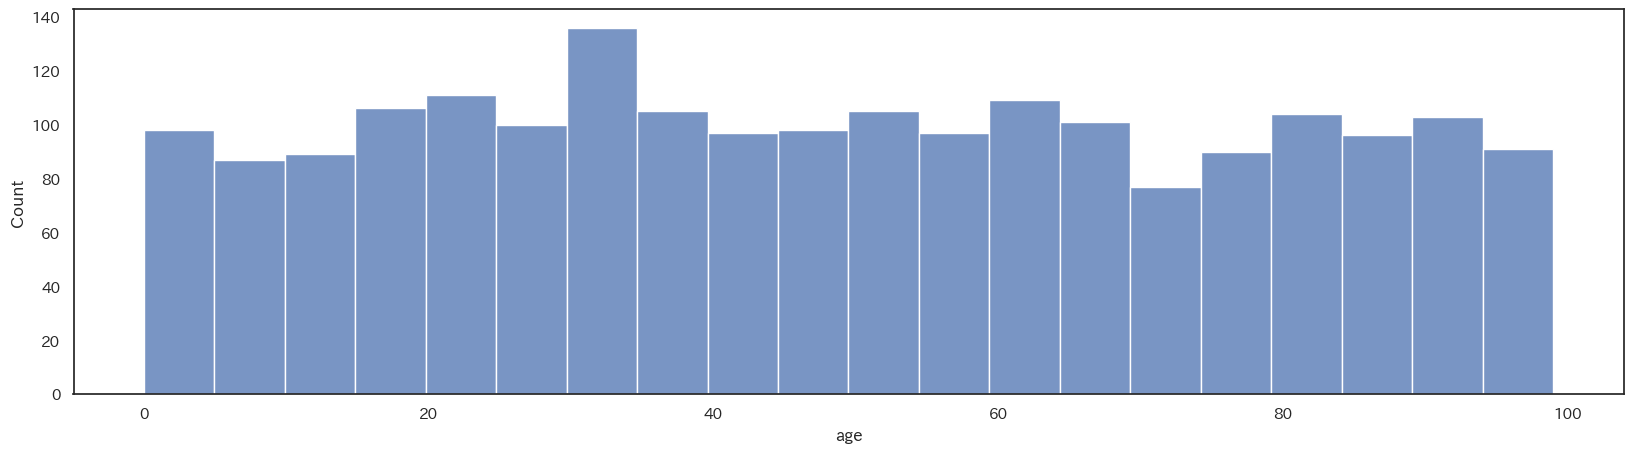

In [13]:
#age
fig = plt.subplots(figsize=(20, 5))
sns.histplot(df_master["age"], bins=20)
df_master["age"].describe()

#各年齢が満遍なく存在する

In [14]:
#5歳以下のデータ
df_master.query('age <= 5')

#annual_incomeやprofessionがしっかり記入されており、family_sizeが1のデータもあり、かなり違和感
#年齢情報は正しくない可能性あり、ageは無視してクラスター化しても良いか

,index,gender,age,annual_income,spending_score,profession,work_experience,family_size
210,211,Female,1,57000,93,Engineer,1,2
211,212,Female,0,22000,92,Artist,2,1
228,229,Male,0,33000,64,Marketing,1,1
234,235,Female,4,84000,54,Artist,9,1
271,272,Female,1,12000,82,Doctor,0,3
...,...,...,...,...,...,...,...,...
1926,1927,Male,3,74607,69,Healthcare,6,1
1951,1952,Male,1,57522,75,Artist,10,5
1979,1980,Male,0,165321,93,Doctor,8,1
1984,1985,Female,2,153622,51,Lawyer,6,6


count      2000.000000
mean     110731.821500
std       45739.536688
min           0.000000
25%       74572.000000
50%      110045.000000
75%      149092.750000
max      189974.000000
Name: annual_income, dtype: float64

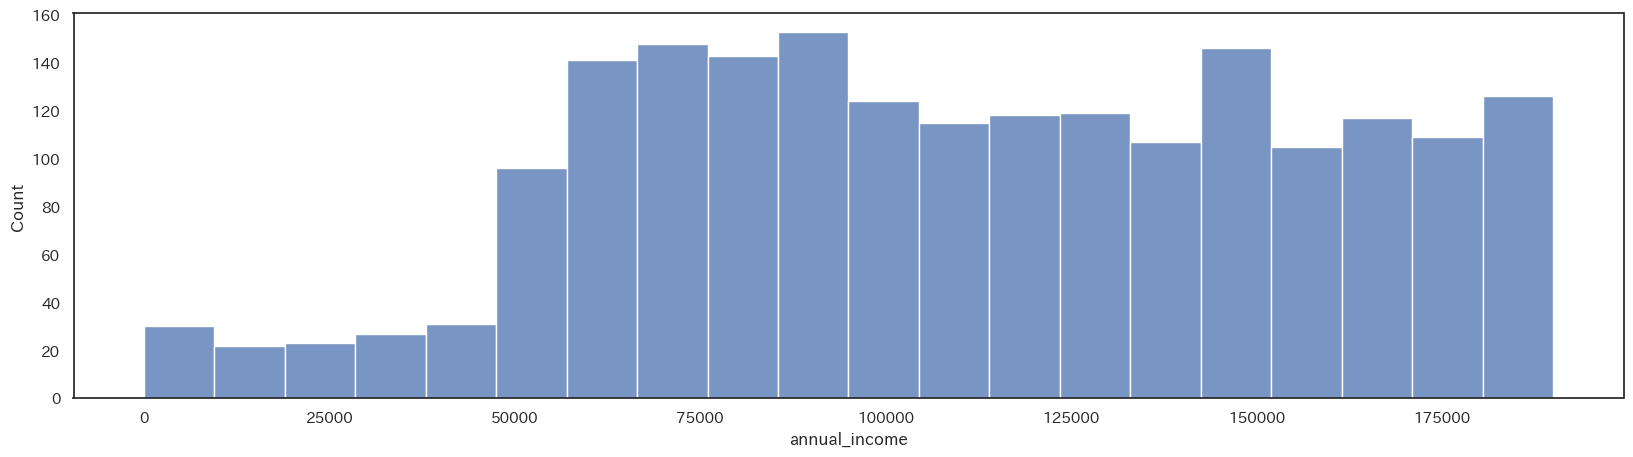

In [15]:
#annual_income
fig = plt.subplots(figsize=(20, 5))
sns.histplot(df_master["annual_income"], bins=20)
df_master["annual_income"].describe()

#50000ドル以上の年収の方が多く、やや富裕層よりの保険？

count    2000.000000
mean       50.962500
std        27.934661
min         0.000000
25%        28.000000
50%        50.000000
75%        75.000000
max       100.000000
Name: spending_score, dtype: float64

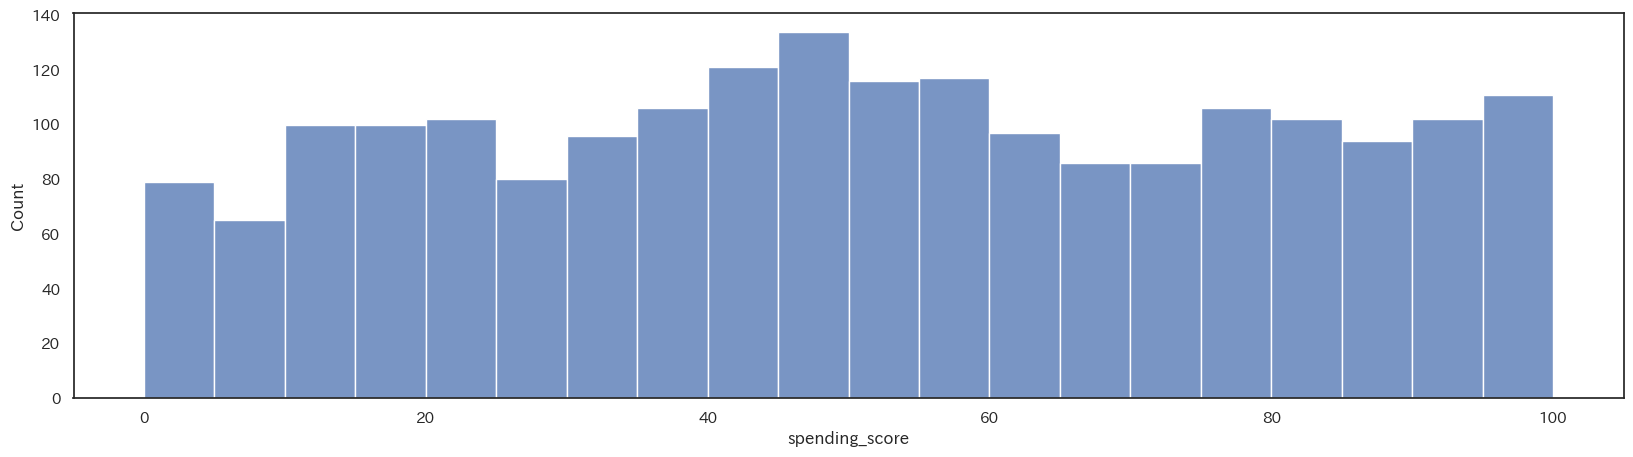

In [17]:
#spending_score
fig = plt.subplots(figsize=(20, 5))
sns.histplot(df_master["spending_score"], bins=20)
df_master["spending_score"].describe()

#満遍なく分布、特に問題無し

profession
Artist           612
Doctor           161
Engineer         179
Entertainment    234
Executive        153
Healthcare       339
Homemaker         60
Lawyer           142
Marketing         85
NULL              35
Name: index, dtype: int64

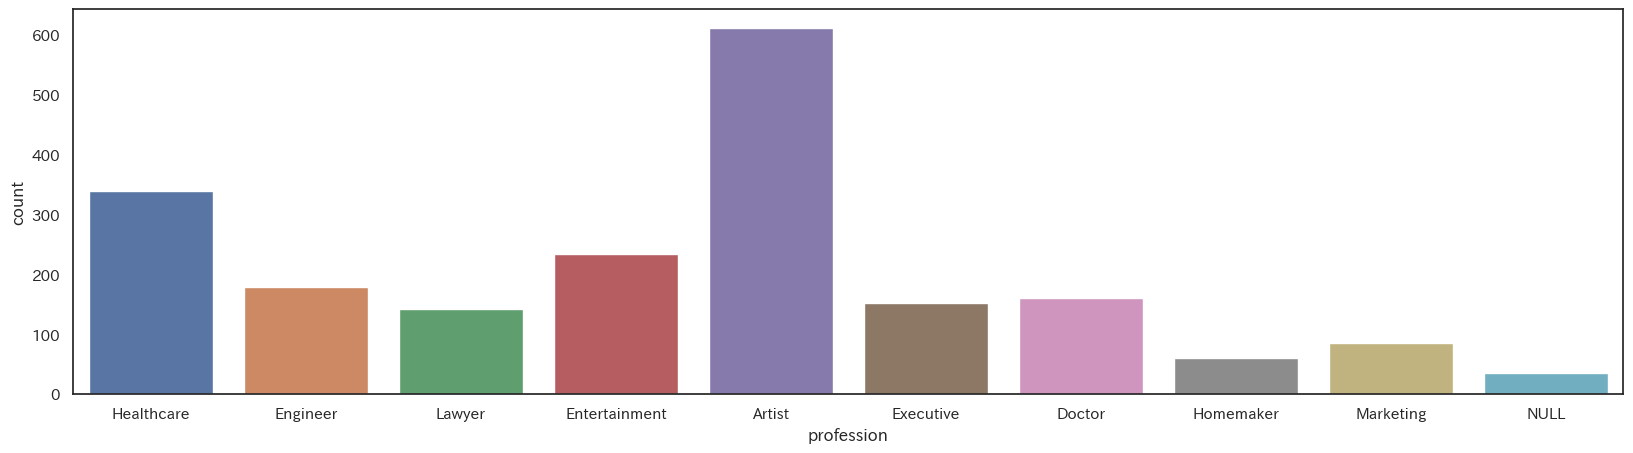

In [18]:
#profession(事前に欠損を一つのカテゴリーとして変換)
df_master["profession"] = df_master["profession"].fillna("NULL")
fig = plt.subplots(figsize=(20,5))
sns.countplot(x="profession", data=df_master)
df_master.groupby("profession").count()["index"]

#Artist, HealthCare, Entertainmentの順に多い(芸能界や保険・医療業界が多め？)
#one-hot encodingを検討(クラスターの場合多重共線性の問題などは生じないため、すべてのカテゴリーをダミー化して問題ない)

work_experience
0     431
1     470
2      63
3      55
4     121
5     117
6     120
7     126
8     166
9     160
10     84
11     14
12     17
13     16
14     16
15     14
16      5
17      5
Name: index, dtype: int64

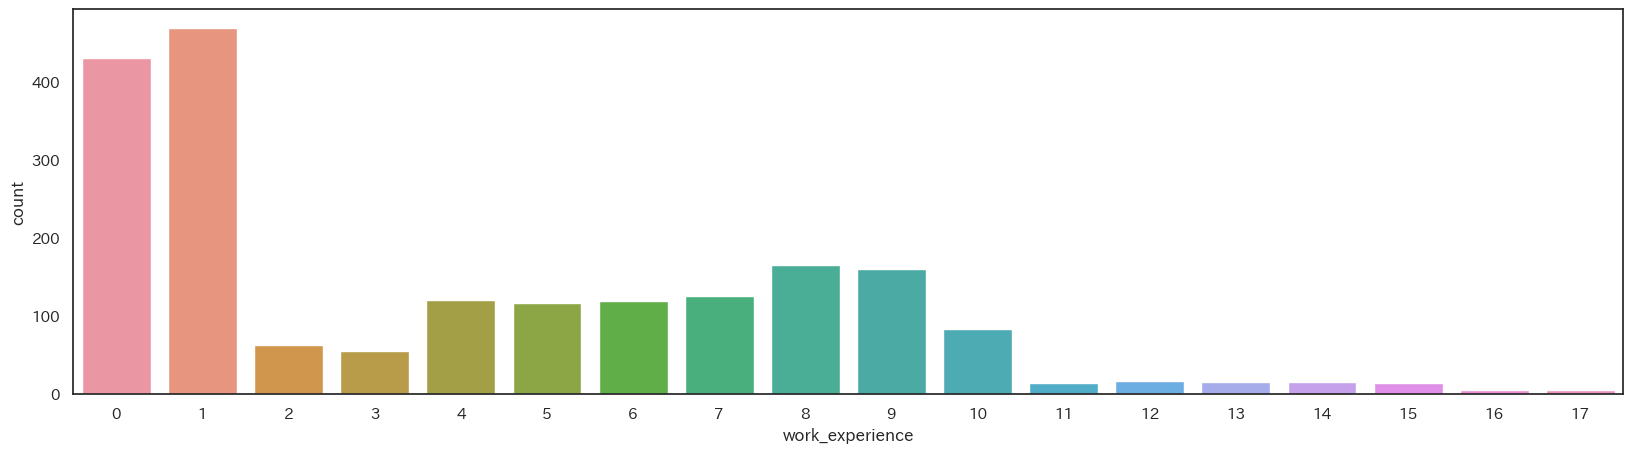

In [19]:
#work_experience
fig = plt.subplots(figsize=(20,5))
sns.countplot(x="work_experience", data=df_master)
df_master.groupby("work_experience").count()["index"]

#0~1年目の人が多い(ここもageの分布と矛盾)

family_size
1    299
2    361
3    311
4    289
5    258
6    243
7    234
8      4
9      1
Name: index, dtype: int64

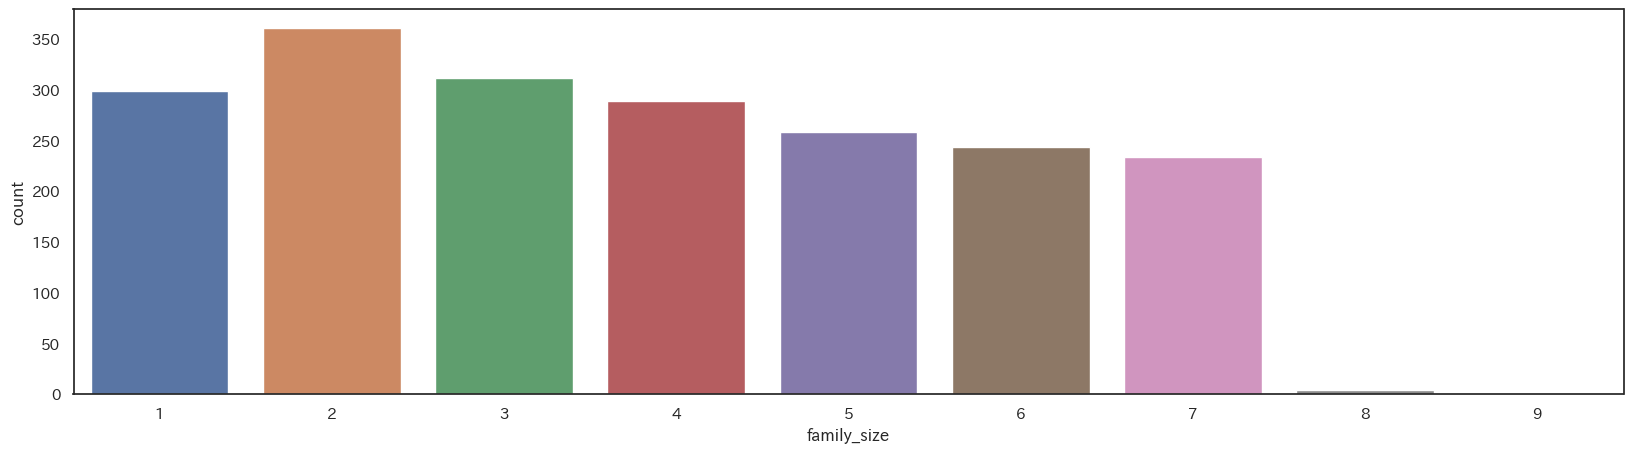

In [21]:
#family_size
fig = plt.subplots(figsize=(20,5))
sns.countplot(x="family_size", data=df_master)
df_master.groupby("family_size").count()["index"]

#1~7人がほとんど

## 前処理

In [27]:
df = df_master.copy()

#index 削除
df = df.drop("index", axis=1)

#gender  M=1,F=0にダミー変換
df["gender"] = df["gender"].map({"Male": 1,  "Female": 0})

#age 削除
df = df.drop("age", axis=1)

#profession one-hot encodingの実施
df["profession_Healthcare"] = df["profession"].apply(lambda x:1 if x == "Healthcare" else 0)
df["profession_Engineer"] = df["profession"].apply(lambda x:1 if x == "Engineer" else 0)
df["profession_Lawyer"] = df["profession"].apply(lambda x:1 if x == "Lawyer" else 0)
df["profession_Entertainment"] = df["profession"].apply(lambda x:1 if x == "Entertainment" else 0)
df["profession_Artist"] = df["profession"].apply(lambda x:1 if x == "Artist" else 0)
df["profession_Executive"] = df["profession"].apply(lambda x:1 if x == "Executive" else 0)
df["profession_Doctor"] = df["profession"].apply(lambda x:1 if x == "Doctor" else 0)
df["profession_Homemaker"] = df["profession"].apply(lambda x:1 if x == "Homemaker" else 0)
df["profession_Marketing"] = df["profession"].apply(lambda x:1 if x == "Marketing" else 0)
df["profession_NULL"] = df["profession"].apply(lambda x:1 if x == "NULL" else 0)
df = df.drop("profession", axis=1)

#他の特徴量は処理の必要無し

#確認
display(df.head())
display(df.describe())
df.info()

,gender,annual_income,spending_score,work_experience,family_size,profession_Healthcare,profession_Engineer,profession_Lawyer,profession_Entertainment,profession_Artist,profession_Executive,profession_Doctor,profession_Homemaker,profession_Marketing,profession_NULL
0,1,15000,39,1,4,1,0,0,0,0,0,0,0,0,0
1,1,35000,81,3,3,0,1,0,0,0,0,0,0,0,0
2,0,86000,6,1,1,0,1,0,0,0,0,0,0,0,0
3,0,59000,77,0,2,0,0,1,0,0,0,0,0,0,0
4,0,38000,40,2,6,0,0,0,1,0,0,0,0,0,0


,gender,annual_income,spending_score,work_experience,family_size,profession_Healthcare,profession_Engineer,profession_Lawyer,profession_Entertainment,profession_Artist,profession_Executive,profession_Doctor,profession_Homemaker,profession_Marketing,profession_NULL
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,0.407000,110731.821500,50.962500,4.102500,3.768500,0.169500,0.089500,0.071000,0.117000,0.306000,0.076500,0.080500,0.03000,0.042500,0.017500
std,0.491398,45739.536688,27.934661,3.922204,1.970749,0.375287,0.285535,0.256889,0.321501,0.460945,0.265863,0.272134,0.17063,0.201777,0.131158
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,74572.000000,28.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,110045.000000,50.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,149092.750000,75.000000,7.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,189974.000000,100.000000,17.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   gender                    2000 non-null   int64
 1   annual_income             2000 non-null   int64
 2   spending_score            2000 non-null   int64
 3   work_experience           2000 non-null   int64
 4   family_size               2000 non-null   int64
 5   profession_Healthcare     2000 non-null   int64
 6   profession_Engineer       2000 non-null   int64
 7   profession_Lawyer         2000 non-null   int64
 8   profession_Entertainment  2000 non-null   int64
 9   profession_Artist         2000 non-null   int64
 10  profession_Executive      2000 non-null   int64
 11  profession_Doctor         2000 non-null   int64
 12  profession_Homemaker      2000 non-null   int64
 13  profession_Marketing      2000 non-null   int64
 14  profession_NULL           2000 non-null 

In [28]:
#標準化(特徴量同士の単位を揃えるためクラスター分析では必須)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_std = ss.fit_transform(df)
df_std = pd.DataFrame(df_std, columns=df.columns)
display(df_std.head())

,gender,annual_income,spending_score,work_experience,family_size,profession_Healthcare,profession_Engineer,profession_Lawyer,profession_Entertainment,profession_Artist,profession_Executive,profession_Doctor,profession_Homemaker,profession_Marketing,profession_NULL
0,1.207064,-2.093501,-0.428339,-0.791207,0.117497,2.213528,-0.313525,-0.276453,-0.364009,-0.66402,-0.287814,-0.295884,-0.175863,-0.210681,-0.13346
1,1.207064,-1.656133,1.075546,-0.281162,-0.390051,-0.451768,3.189543,-0.276453,-0.364009,-0.66402,-0.287814,-0.295884,-0.175863,-0.210681,-0.13346
2,-0.828457,-0.540845,-1.609962,-0.791207,-1.405148,-0.451768,3.189543,-0.276453,-0.364009,-0.66402,-0.287814,-0.295884,-0.175863,-0.210681,-0.13346
3,-0.828457,-1.131292,0.932319,-1.046230,-0.897599,-0.451768,-0.313525,3.617251,-0.364009,-0.66402,-0.287814,-0.295884,-0.175863,-0.210681,-0.13346
4,-0.828457,-1.590528,-0.392532,-0.536185,1.132594,-0.451768,-0.313525,-0.276453,2.747182,-0.66402,-0.287814,-0.295884,-0.175863,-0.210681,-0.13346


## クラスター作成、検証、評価

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='col1', ylabel='col2'>

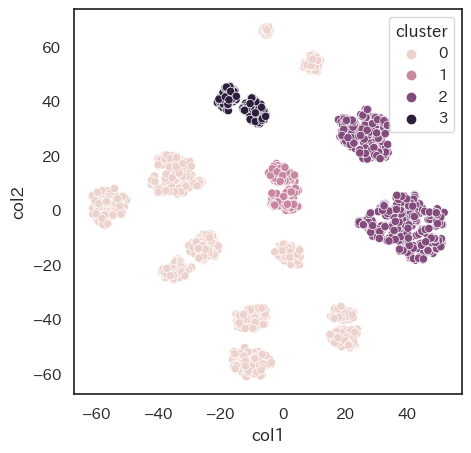

In [42]:
#非階層性クラスター分析(データ数が多いケースでは、処理速度が速い非階層性クラスターが良い)
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4, random_state=1)
clusters=kmeans.fit(df_std)
df["cluster"]=clusters.labels_

#特徴量を2次元に次元削減後、クラスターをグラフ化
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=1)
x = tsne.fit_transform(df_std)
tsne_df = pd.DataFrame(x, columns=["col1", "col2"])
tsne_df["cluster"] = df["cluster"]
fig = plt.subplots(figsize=(5,5))
sns.scatterplot(x="col1", y="col2", hue="cluster", data=tsne_df)

In [44]:
#クラスター毎に各特徴量の平均値を算出
display(df.groupby("cluster").count()["gender"])
display(df.groupby("cluster").mean())

cluster
0    1074
1     161
2     612
3     153
Name: gender, dtype: int64

,gender,annual_income,spending_score,work_experience,family_size,profession_Healthcare,profession_Engineer,profession_Lawyer,profession_Entertainment,profession_Artist,profession_Executive,profession_Doctor,profession_Homemaker,profession_Marketing,profession_NULL
cluster,,,,,,,,,,,,,,,
0,0.413408,111287.018622,49.995345,3.986965,3.820298,0.315642,0.166667,0.132216,0.217877,0.0,0.0,0.0,0.055866,0.079143,0.032588
1,0.447205,111573.217391,51.900621,4.304348,3.670807,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000
2,0.379085,108776.580065,52.678105,4.215686,3.653595,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.431373,113770.130719,49.901961,4.248366,3.967320,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000


**考察**  
profession以外はほとんど差がなく、professionの影響を受けすぎてうまくクラスタリングできていない。  
▶️professionを特徴料から省き、再度実行

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='col1', ylabel='col2'>

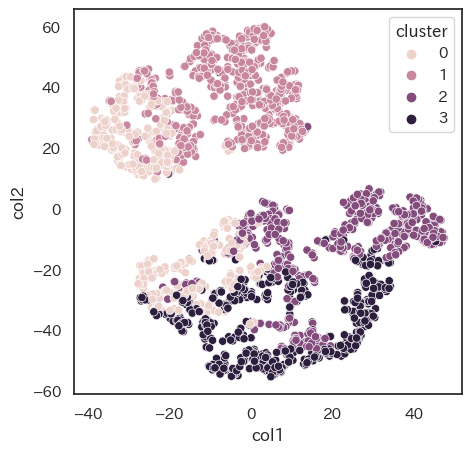

In [45]:
#特徴料からprofessionを省く
df_std2 = df_std[["gender", "annual_income", "spending_score", "work_experience", "family_size"]]

#再度クラスタリングを実施
kmeans=KMeans(n_clusters=4, random_state=1)
clusters=kmeans.fit(df_std2)
df["cluster"]=clusters.labels_

#特徴量を2次元に次元削減後、クラスターをグラフ化
tsne = TSNE(n_components=2, random_state=1)
x = tsne.fit_transform(df_std2)
tsne_df = pd.DataFrame(x, columns=["col1", "col2"])
tsne_df["cluster"] = df["cluster"]
fig = plt.subplots(figsize=(5,5))
sns.scatterplot(x="col1", y="col2", hue="cluster", data=tsne_df)

In [46]:
#クラスター毎に各特徴量の平均値を算出
display(df.groupby("cluster").count()["gender"])
display(df.groupby("cluster").mean())

cluster
0    442
1    572
2    492
3    494
Name: gender, dtype: int64

,gender,annual_income,spending_score,work_experience,family_size,profession_Healthcare,profession_Engineer,profession_Lawyer,profession_Entertainment,profession_Artist,profession_Executive,profession_Doctor,profession_Homemaker,profession_Marketing,profession_NULL
cluster,,,,,,,,,,,,,,,
0,0.538462,128832.536199,43.861991,9.470588,3.794118,0.180995,0.090498,0.054299,0.090498,0.287330,0.092760,0.088235,0.049774,0.045249,0.020362
1,1.000000,104315.445804,52.786713,2.125874,3.835664,0.176573,0.092657,0.076923,0.136364,0.283217,0.078671,0.085664,0.019231,0.036713,0.013986
2,0.004065,79891.310976,38.396341,2.802846,2.721545,0.138211,0.091463,0.085366,0.105691,0.347561,0.052846,0.075203,0.034553,0.048780,0.020325
3,0.004049,132681.582996,67.718623,2.882591,4.710526,0.182186,0.082996,0.064777,0.129555,0.307692,0.082996,0.072874,0.020243,0.040486,0.016194


**考察**  
**cluster1(堅実な年配顧客グループ)**:勤務年数が圧倒的に長く、年配の方が多そう。年収も比較的高いが、その割に支出スコアは低め(貯金が多いかも？)  
▶年齢面と貯金の多さが特徴的なため、そこをつく提案ができると良いか  
**cluster2(転職後男性グループ)**:勤務年数が短い男性、家族人数は比較的多いことや年収がすごく低いわけではないので、新卒ではなく転職したての人たちが多そう  
▶全員男性であることと、転職直後であることが特徴的なため、そこを加味した提案をしたい  
**cluster3(若め女性グループ)**:ほぼ女性、年収と支出スコアは低め、家族も少ない、Artist率高め。全体的に若めの女性Artistが多そうな印象。  
▶今後出産イベントなどもまだ残っている中、経済面に不安がありそう。そこに適した提案が良さそう  
**cluster4(要注意グループ)**:年収、支出スコアどちらも高い女性。家族も多いためやや年齢も高めか。    
▶とにかく経済的余裕がありそうなので、不要な保険も多そう。経済面以外の不安を解消する保険を提案していくのが良い  